In [5]:
pip --version


pip 25.1 from C:\Users\rahul\anaconda3\Lib\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("G:/Projects/Techsophy/archive/ci_cd_logs.csv")


In [11]:
print(df.shape)
print(df.dtypes)
print(df.head())

(800, 11)
timestamp      object
pipeline_id    object
stage_name     object
job_name       object
task_name      object
status         object
message        object
commit_id      object
branch         object
user           object
environment    object
dtype: object
                  timestamp pipeline_id stage_name           job_name  \
0  2024-03-02 01:05:07+0000  pipe-txnem      Build  deploy_to_staging   
1  2024-07-22 19:55:41+0000  pipe-hjahz      Build     run_unit_tests   
2  2024-03-01 23:03:43+0000  pipe-vcsbx   Analysis      deploy_to_dev   
3  2024-06-02 12:21:00+0000  pipe-pnvzk       Test      deploy_to_dev   
4  2024-04-17 07:59:29+0000  pipe-mwkkl       Test     build_and_test   

  task_name   status                                       message  \
0   analyze  success                  Task completed successfully.   
1    deploy  skipped  Task was skipped due to pipeline conditions.   
2    deploy  success                  Task completed successfully.   
3      test  sk

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df['timestamp']

0     2024-03-02 01:05:07+00:00
1     2024-07-22 19:55:41+00:00
2     2024-03-01 23:03:43+00:00
3     2024-06-02 12:21:00+00:00
4     2024-04-17 07:59:29+00:00
                 ...           
795   2024-04-26 15:53:27+00:00
796   2024-11-11 20:08:27+00:00
797   2024-10-25 22:22:12+00:00
798   2024-02-26 20:57:37+00:00
799   2024-10-21 17:09:01+00:00
Name: timestamp, Length: 800, dtype: datetime64[ns, UTC]

In [17]:
print("\nDeployment Task Status Counts:")
print(df['status'].value_counts())


Deployment Task Status Counts:
skipped    219
running    206
failed     194
success    181
Name: status, dtype: int64


In [19]:
print("\nUnique Pipelines:", df['pipeline_id'].nunique())
print("Unique Users:", df['user'].nunique())
print("Unique Stages:", df['stage_name'].unique())


Unique Pipelines: 800
Unique Users: 398
Unique Stages: ['Build' 'Analysis' 'Test' 'Deploy']


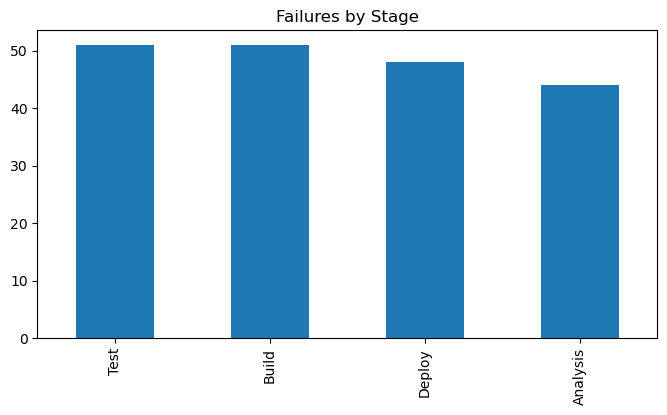

In [21]:
failures = df[df['status'] == 'failed']
stage_failures = failures['stage_name'].value_counts()
stage_failures.plot(kind='bar', title='Failures by Stage', figsize=(8,4))
plt.show()

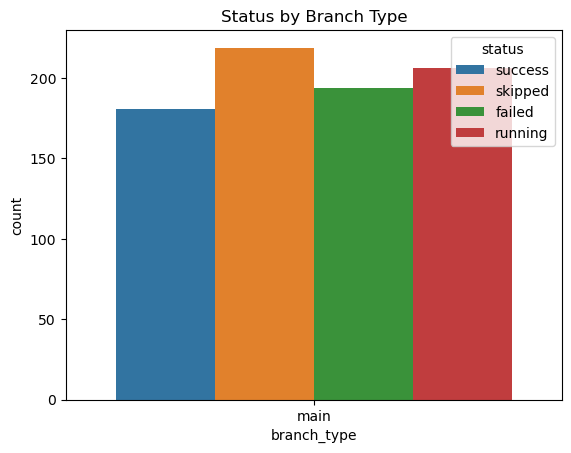

In [23]:
df['branch_type'] = df['branch'].apply(lambda b: 'feature' if 'feature' in b.lower() else 'main')
sns.countplot(x='branch_type', hue='status', data=df)
plt.title("Status by Branch Type")
plt.show()

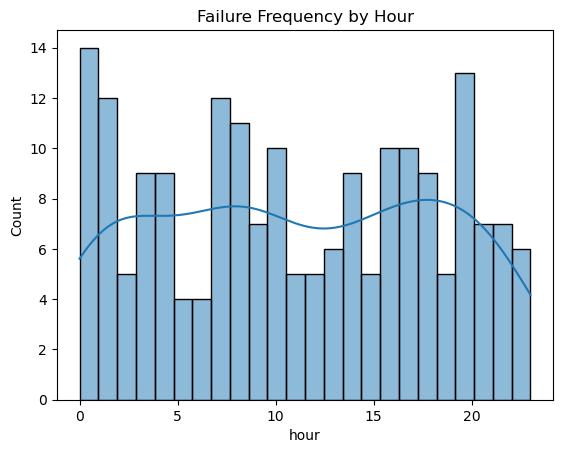

In [25]:
df['hour'] = df['timestamp'].dt.hour
sns.histplot(data=df[df['status'] == 'failed'], x='hour', bins=24, kde=True)
plt.title("Failure Frequency by Hour")
plt.show()

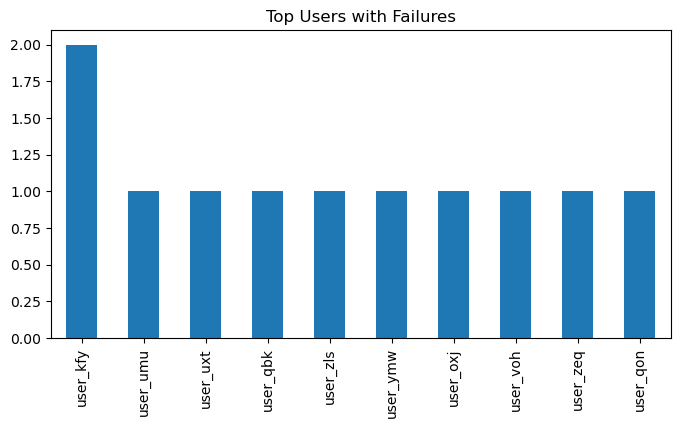

In [27]:
user_fail_rate = failures['user'].value_counts().head(10)
user_fail_rate.plot(kind='bar', title="Top Users with Failures", figsize=(8,4))
plt.show()

In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['status'] = df['status'].str.lower()

In [35]:
df['status']

0      success
1      skipped
2      success
3      skipped
4       failed
        ...   
795    skipped
796     failed
797    skipped
798    skipped
799     failed
Name: status, Length: 800, dtype: object

In [31]:
df['user'] = df['user'].fillna("unknown")
df['environment'] = df['environment'].fillna("unknown")

In [37]:
df['environment']

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
          ...     
795    development
796        unknown
797        unknown
798        unknown
799        unknown
Name: environment, Length: 800, dtype: object

In [39]:
df['user']

0       unknown
1      user_psc
2      user_usq
3       unknown
4      user_umu
         ...   
795    user_kcw
796     unknown
797     unknown
798     unknown
799     unknown
Name: user, Length: 800, dtype: object

In [33]:
df['final_status'] = df['status'].apply(lambda x: 'failed' if x == 'failed' else 'passed')

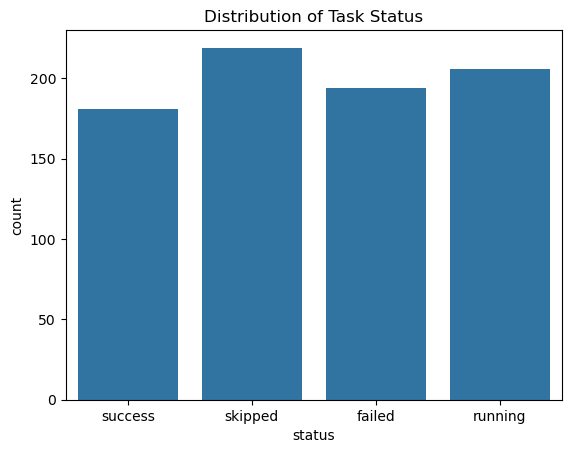

In [41]:
sns.countplot(x='status', data=df)
plt.title("Distribution of Task Status")
plt.show()


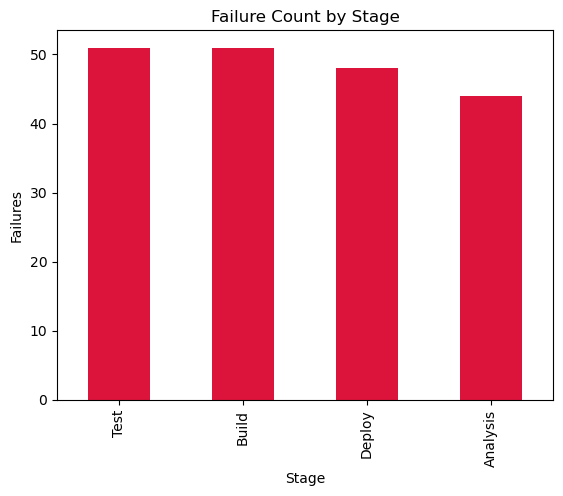

In [43]:
failures = df[df['status'] == 'failed']
stage_failure_counts = failures['stage_name'].value_counts()

stage_failure_counts.plot(kind='bar', color='crimson')
plt.title("Failure Count by Stage")
plt.ylabel("Failures")
plt.xlabel("Stage")
plt.show()


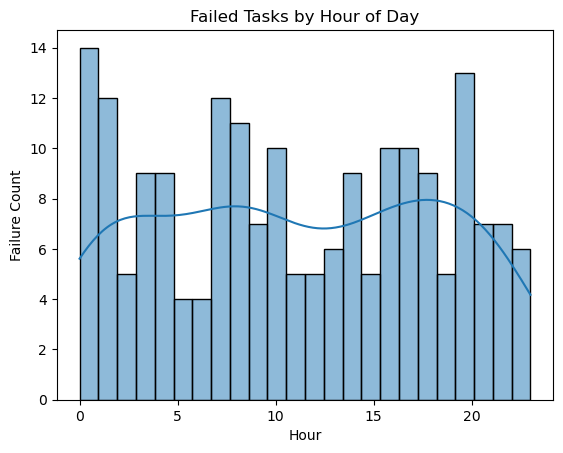

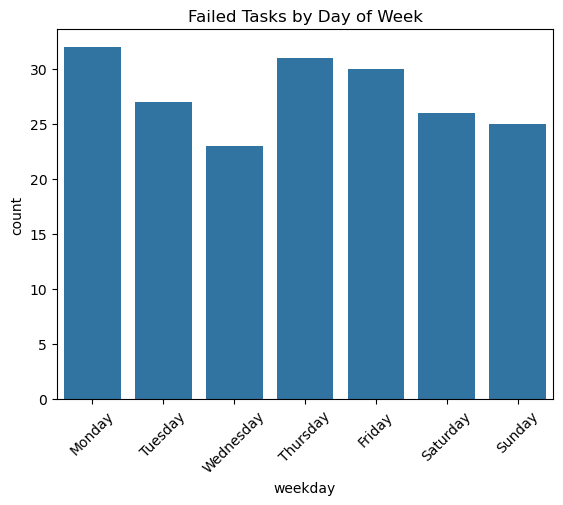

In [45]:
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

# Failures by Hour
sns.histplot(df[df['status'] == 'failed']['hour'], bins=24, kde=True)
plt.title("Failed Tasks by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Failure Count")
plt.show()

# Failures by Weekday
sns.countplot(data=df[df['status'] == 'failed'], x='weekday',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Failed Tasks by Day of Week")
plt.xticks(rotation=45)
plt.show()


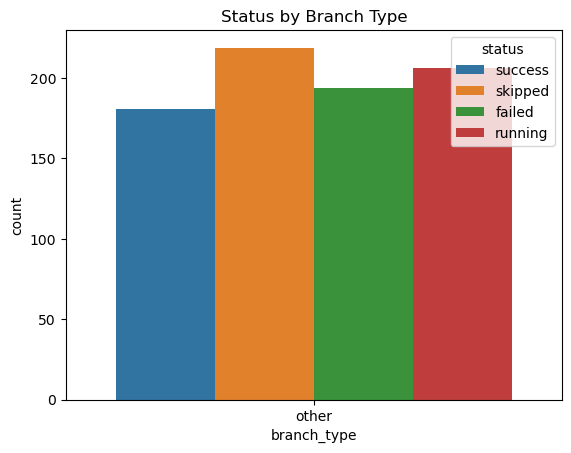

In [47]:
df['branch_type'] = df['branch'].apply(lambda b: 'feature' if 'feature' in b.lower() else 'other')

sns.countplot(x='branch_type', hue='status', data=df)
plt.title("Status by Branch Type")
plt.show()

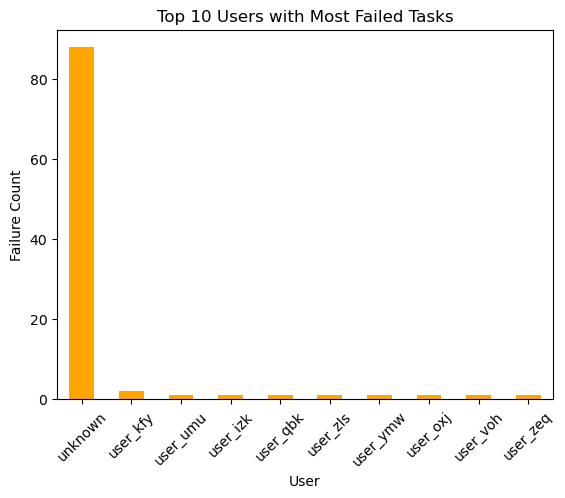

In [49]:
top_failures_by_user = df[df['status'] == 'failed']['user'].value_counts().head(10)

top_failures_by_user.plot(kind='bar', color='orange')
plt.title("Top 10 Users with Most Failed Tasks")
plt.ylabel("Failure Count")
plt.xlabel("User")
plt.xticks(rotation=45)
plt.show()

In [51]:
pipeline_labels = df.groupby('pipeline_id')['status'].apply(lambda x: 1 if 'failed' in x.values else 0)
pipeline_labels.name = 'deployment_failed'

In [53]:
task_counts = df.groupby('pipeline_id')['task_name'].count()
task_counts.name = 'num_tasks'

In [55]:
failed_tasks = df[df['status'] == 'failed'].groupby('pipeline_id')['task_name'].count()
failed_tasks = failed_tasks.reindex(task_counts.index, fill_value=0)
failed_tasks.name = 'num_failed_tasks'

In [57]:
stage_counts = df.groupby('pipeline_id')['stage_name'].nunique()
stage_counts.name = 'num_stages'

In [59]:
deploy_times = df.groupby('pipeline_id')['timestamp'].max()
deploy_times.name = 'deploy_time'
deploy_hours = deploy_times.dt.hour
deploy_days = deploy_times.dt.dayofweek 

In [61]:
df['branch_type'] = df['branch'].apply(lambda x: 'feature' if 'feature' in x.lower() else 'other')
branch_type = df.groupby('pipeline_id')['branch_type'].first()
branch_type = branch_type.map({'feature': 1, 'other': 0}) 

In [63]:
user_by_pipeline = df.groupby('pipeline_id')['user'].first()

In [65]:
X = pd.concat([task_counts, failed_tasks, stage_counts, deploy_hours, deploy_days, branch_type], axis=1)
X.columns = ['num_tasks', 'num_failed_tasks', 'num_stages', 'deploy_hour', 'deploy_day', 'is_feature_branch']

In [67]:
X['deployment_failed'] = pipeline_labels

# Optional: One-hot encode day of week
X = pd.get_dummies(X, columns=['deploy_day'], drop_first=True)


print(X.head())


             num_tasks  num_failed_tasks  num_stages  deploy_hour  \
pipeline_id                                                         
pipe-aajpt           1                 0           1           16   
pipe-aavnq           1                 0           1            0   
pipe-acftp           1                 0           1           11   
pipe-acoca           1                 0           1           19   
pipe-adxsr           1                 0           1            1   

             is_feature_branch  deployment_failed  deploy_day_1  deploy_day_2  \
pipeline_id                                                                     
pipe-aajpt                   0                  0             0             0   
pipe-aavnq                   0                  0             0             0   
pipe-acftp                   0                  0             0             0   
pipe-acoca                   0                  0             0             0   
pipe-adxsr                   0

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
y = X['deployment_failed']
X_model = X.drop('deployment_failed', axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [73]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        39

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



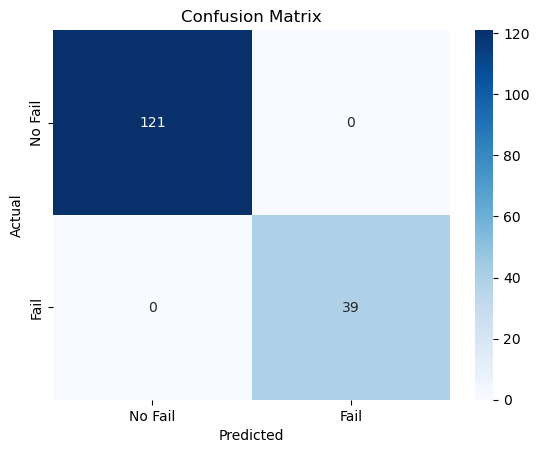

In [75]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fail", "Fail"], yticklabels=["No Fail", "Fail"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
import joblib
joblib.dump(clf, "deployment_risk_model.pkl")


['deployment_risk_model.pkl']

In [79]:
import joblib
import os

# Define your desired absolute path
model_dir = r"G:\Projects\Techsophy\models"  # raw string for Windows path

# Ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

# Set full model path
model_path = os.path.join(model_dir, "deployment_risk_model.pkl")

# Save your trained model
joblib.dump(clf, model_path)

print(f" Model successfully saved at: {model_path}")


 Model successfully saved at: G:\Projects\Techsophy\models\deployment_risk_model.pkl


In [ ]:
# Aggregating raw logs into features
pipeline_features = df.groupby('pipeline_id').agg({
    'task_name': 'count',
    'status': lambda x: sum(x == 'failed'),
    'timestamp': lambda x: pd.to_datetime(x).dt.hour.iloc[0],
    'branch': lambda x: x.iloc[0].startswith('feature'),
    'status': lambda x: 1 if 'failed' in x.values else 0
}).rename(columns={
    'task_name': 'num_tasks',
    'status': 'deployment_failed'
})

# Save to CSV
pipeline_features.reset_index().to_csv("deployment_features.csv", index=False)
